In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

## Data preparation process

In [481]:
data = pd.read_csv('all_data.csv',encoding ='utf8')
data.head()

,Заголовок,ссылка,Цена,Адрес,Дата,comment
0,"1-комнатная квартира, 49.5 м², 2/9 этажВсе зам...",https://krisha.kz//a/show/663075721,16 000 000〒,"Алатауский р-н, мкр Акбулак, Чуланова 117",Алматы29 нояб.,"монолитный дом, 2008 г.п., состояние: хорошее,..."
1,"1-комнатная квартира, 40 м², 6/9 этажВсе замет...",https://krisha.kz//a/show/663234797,13 000 000〒,"Алатауский р-н, мкр Зердели (Алгабас-6), Мкр З...",Алматы28 нояб.,"монолитный дом, 2016 г.п., состояние: хорошее,..."
2,"1-комнатная квартира, 40 м², 1/5 этажВсе замет...",https://krisha.kz//a/show/662745922,14 000 000〒,"Алатауский р-н, мкр Саялы, Мкр Саялы",Алматы28 нояб.,"монолитный дом, 2015 г.п., состояние: евроремо..."
3,"1-комнатная квартира, 44.5 м², 2/9 этажВсе зам...",https://krisha.kz//a/show/663453756,16 200 000〒,"Алатауский р-н, Райымбека",Алматы29 нояб.,"В залоге, жил. комплекс АкКент, монолитный дом..."
4,"1-комнатная квартира, 45 м², 2/9 этажВсе замет...",https://krisha.kz//a/show/663488000,15 700 000〒,"Алатауский р-н, Аккент, Райымбека",Алматы29 нояб.,"жил. комплекс АкКент, монолитный дом, 2011 г.п..."


In [482]:
a, b = data.shape
count = 0

names =[]
areas = []
floors = []
allfloors = []

def analysisofname(name):    
    name = name.split(",")
    names.append(name[0])
    
    if len(name) == 3:
        areas.append(float(name[1].replace('м²','').replace('м', '').replace(' ','')))
        f = int(name[2].split(" ")[1].split("/")[0])
        floors.append(f)
        
        asd = name[2].split(" ")[1].split("/")
        if len(asd) == 1:
            allfloors.append(f) 
        else:
            allfloors.append(int(asd[1]))
    else:
        area = float(name[1].replace('м²Все','').replace('заметкиУдалить','').replace('м²','').replace('м', '').replace(' ',''))
        areas.append(area)
        floors.append(int(1))
        allfloors.append(int(1))
        
for i in range(0, a):
    analysisofname(data['Заголовок'][i])
    count = count + 1

In [483]:
prices = []
priceoo = []
ccc = 0

def analysisprice(price):
    if pd.isnull(price):
        price.append(float('0'))
    else:
        pp = price.replace('〒','').replace('от','').replace('.','').replace('\xa0', '')
        
        prices.append(int(pp))

for i in range(0, a):
    analysisprice(data['Цена'][i])
    ccc = ccc + 1

In [484]:
region = []
qwe = 0

def analysisregion(reg):
    reg = reg.split(",")
    region.append(reg[0].replace('р-н', '').replace('\xa0', ''))
    
for i in range(0, a):
    analysisregion(data['Адрес'][i])
    qwe = qwe + 1

In [487]:
years = []
qwe = 0

def getyear(data):
    year = data.split(' г.п.')
    if 'г.п' in year[0]:
        years.append(int(2000))
    else:
        years.append(int(year[0][-4:]))
    
for i in range(0, a):
    getyear(data['comment'][i])
    qwe = qwe + 1

In [488]:
def floortoint(asd):
    return int(asd)

def pricedividetothousand(price):
    return round(price/1000000, 2) 

def roomsof(rooming):
    return int(rooming.split('-')[0])

In [489]:
dataset = pd.DataFrame({
    'name': names,
    'area': areas,
    'floor': floors,
    'allfloor': allfloors,
    'price': prices,
    'region': region,
    'year': years
})

dataset['link'] = data['ссылка']
dataset['comment'] = data['comment']

dataset['floor'].apply(floortoint)
dataset['priceth'] = dataset['price'].apply(pricedividetothousand)
dataset['room'] = df['name'].apply(roomsof)

dataset.head(10)

,name,area,floor,allfloor,price,region,year,link,comment,priceth,room
0,1-комнатная квартира,49.5,2,9,16000000,Алатауский,2008,https://krisha.kz//a/show/663075721,"монолитный дом, 2008 г.п., состояние: хорошее,...",16.00,1.0
1,1-комнатная квартира,40.0,6,9,13000000,Алатауский,2016,https://krisha.kz//a/show/663234797,"монолитный дом, 2016 г.п., состояние: хорошее,...",13.00,1.0
2,1-комнатная квартира,40.0,1,5,14000000,Алатауский,2015,https://krisha.kz//a/show/662745922,"монолитный дом, 2015 г.п., состояние: евроремо...",14.00,1.0
3,1-комнатная квартира,44.5,2,9,16200000,Алатауский,2010,https://krisha.kz//a/show/663453756,"В залоге, жил. комплекс АкКент, монолитный дом...",16.20,1.0
4,1-комнатная квартира,45.0,2,9,15700000,Алатауский,2011,https://krisha.kz//a/show/663488000,"жил. комплекс АкКент, монолитный дом, 2011 г.п...",15.70,1.0
5,1-комнатная квартира,31.0,2,2,8990000,Алатауский,1964,https://krisha.kz//a/show/663354015,"1964 г.п., состояние: евроремонт, жил. площадь...",8.99,1.0
6,1-комнатная квартира,37.0,10,12,14600000,Алатауский,2020,https://krisha.kz//a/show/663588275,"жил. комплекс Алмалы, монолитный дом, 2020 г.п...",14.60,1.0
7,1-комнатная квартира,35.0,10,12,16100000,Алатауский,2019,https://krisha.kz//a/show/663439829,"жил. комплекс Алмалы, 2019 г.п., состояние: ев...",16.10,1.0
8,1-комнатная квартира,36.0,4,5,11700000,Алатауский,2013,https://krisha.kz//a/show/663271600,"В залоге, монолитный дом, 2013 г.п., состояние...",11.70,1.0
9,1-комнатная квартира,36.0,3,4,12500000,Алатауский,2013,https://krisha.kz//a/show/663275404,"панельный дом, 2013 г.п., состояние: хорошее, ...",12.50,1.0


In [490]:
df = dataset[dataset['year'] != ' г.п']
df = df[df['region'] != 'Жамакаева 252ИпотекаИпотекаКвартиры']
df = df[df['region'] != 'Таттимбета 86']
df = df[df['region'] != 'Кемертоган МТФ 345']
df = df[df['region'] != 'Курмангазы 173 — Айманова']
df = df[df['priceth'] <= 150.0]

D:\Programs\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [491]:
df.head()

,name,area,floor,allfloor,price,region,year,link,comment,priceth,room
0,1-комнатная квартира,49.5,2,9,16000000,Алатауский,2008,https://krisha.kz//a/show/663075721,"монолитный дом, 2008 г.п., состояние: хорошее,...",16.0,1.0
1,1-комнатная квартира,40.0,6,9,13000000,Алатауский,2016,https://krisha.kz//a/show/663234797,"монолитный дом, 2016 г.п., состояние: хорошее,...",13.0,1.0
2,1-комнатная квартира,40.0,1,5,14000000,Алатауский,2015,https://krisha.kz//a/show/662745922,"монолитный дом, 2015 г.п., состояние: евроремо...",14.0,1.0
3,1-комнатная квартира,44.5,2,9,16200000,Алатауский,2010,https://krisha.kz//a/show/663453756,"В залоге, жил. комплекс АкКент, монолитный дом...",16.2,1.0
4,1-комнатная квартира,45.0,2,9,15700000,Алатауский,2011,https://krisha.kz//a/show/663488000,"жил. комплекс АкКент, монолитный дом, 2011 г.п...",15.7,1.0


# 1. General

### General analysis

In [492]:
print(df.shape)

(6336, 11)


In [493]:
print(df.columns)

Index(['name', 'area', 'floor', 'allfloor', 'price', 'region', 'year', 'link',
       'comment', 'priceth', 'room'],
      dtype='object')


In [494]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6336 entries, 0 to 6805
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6336 non-null   object 
 1   area      6336 non-null   float64
 2   floor     6336 non-null   int64  
 3   allfloor  6336 non-null   int64  
 4   price     6336 non-null   int64  
 5   region    6336 non-null   object 
 6   year      6336 non-null   int64  
 7   link      6336 non-null   object 
 8   comment   6336 non-null   object 
 9   priceth   6336 non-null   float64
 10  room      6312 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 594.0+ KB
None


In [495]:
df.describe()

,area,floor,allfloor,price,year,priceth,room
count,6336.000000,6336.000000,6336.000000,6.336000e+03,6336.000000,6336.000000,6312.000000
mean,79.659706,4.395044,7.244160,3.548796e+07,1996.847696,35.487956,2.603295
std,53.714319,3.344569,4.422824,2.934530e+07,19.097325,29.345301,1.389725
min,10.000000,1.000000,1.000000,2.500000e+06,1934.000000,2.500000,1.000000
25%,45.000000,2.000000,5.000000,1.750000e+07,1980.000000,17.500000,1.000000
50%,65.000000,4.000000,5.000000,2.500000e+07,2004.000000,25.000000,2.000000
75%,92.000000,6.000000,9.000000,3.986381e+07,2015.000000,39.865000,3.000000
max,600.000000,26.000000,43.000000,1.500000e+08,2022.000000,150.000000,20.000000


In [496]:
df['region'].value_counts()

Бостандыкский     998
Медеуский         919
Алмалинский       890
Ауэзовский        849
Наурызбайский     721
Турксибский       670
Жетысуский        653
Алатауский        636
Name: region, dtype: int64

In [497]:
df['price'].mean()

35487957.14204545

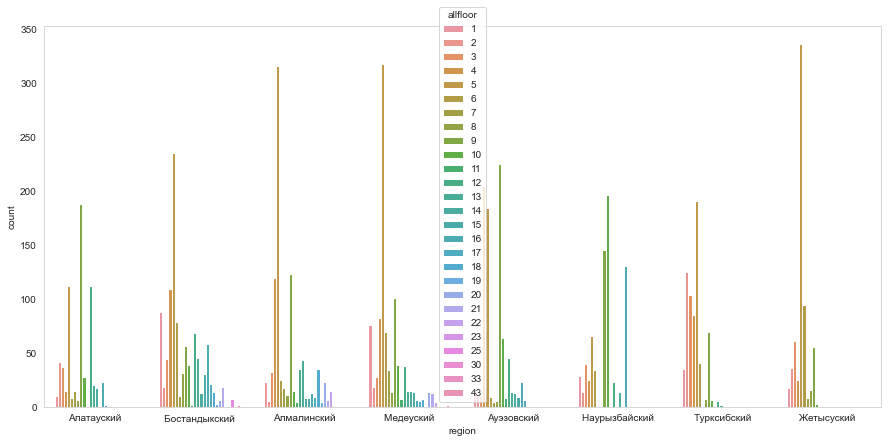

In [498]:
sns.countplot(x='region', hue='allfloor', data=df)

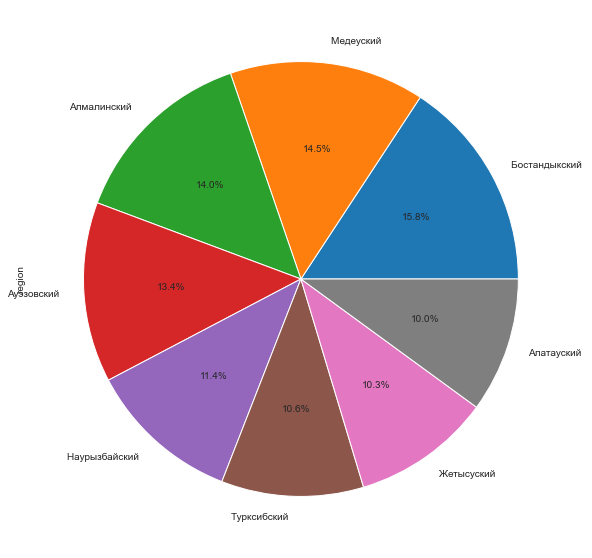

In [499]:
# this plot is about how many appartements by region
plt.figure(figsize=(12,10))
df['region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

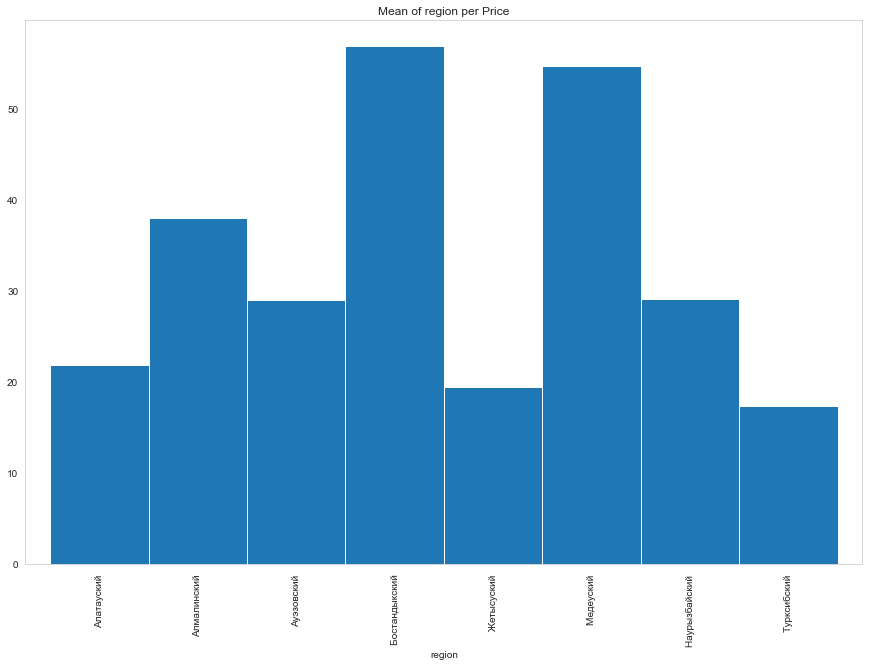

In [501]:
df.groupby('region')['priceth'].mean().plot.bar(width=1, figsize=(15,10))
plt.title('Mean of region per Price')
plt.show()

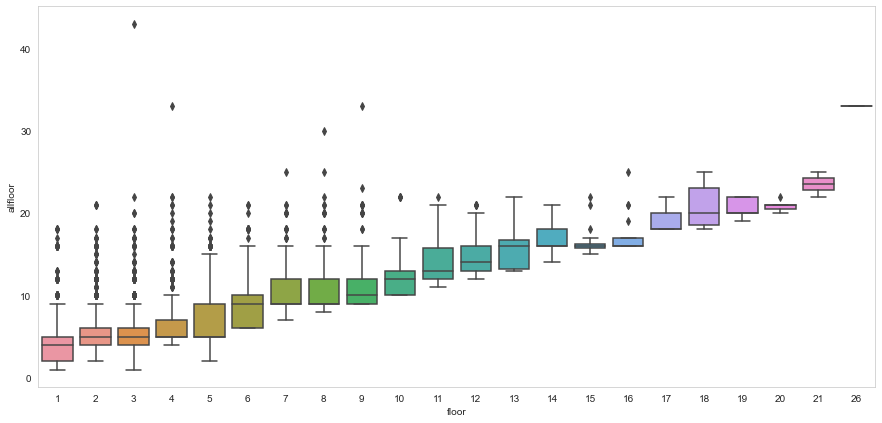

In [511]:
fig = sns.boxplot(x='floor', y="allfloor", data=df)

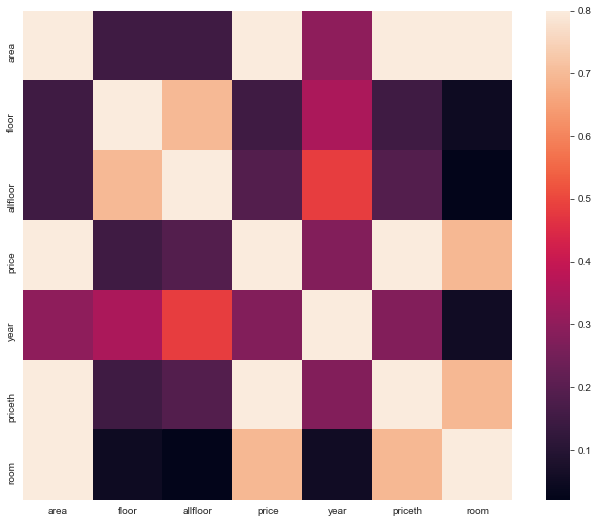

In [512]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)

# Price analysis

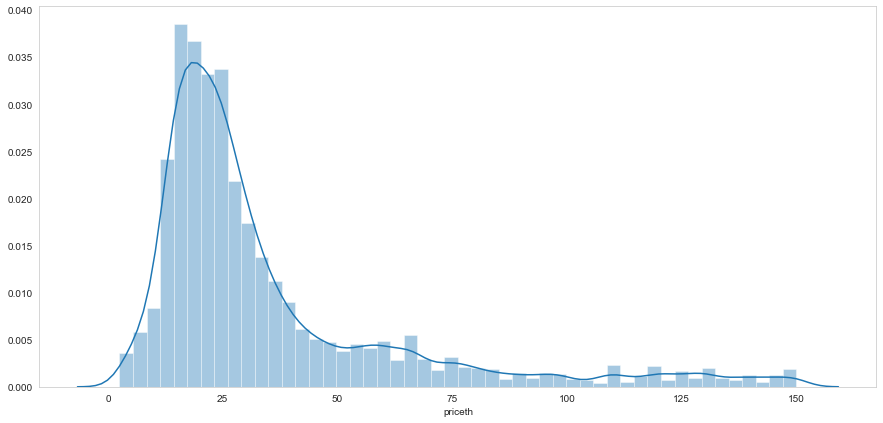

In [502]:
#histogram
sns.distplot(df['priceth']);

In [503]:
df['priceth'].describe()

count    6336.000000
mean       35.487956
std        29.345301
min         2.500000
25%        17.500000
50%        25.000000
75%        39.865000
max       150.000000
Name: priceth, dtype: float64

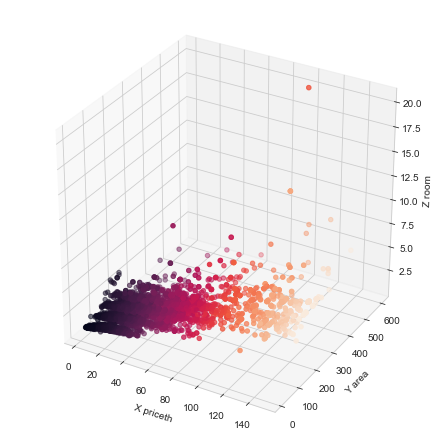

In [504]:
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = df['priceth']
y = df['area']
z = df['room']


ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('X priceth')
ax.set_ylabel('Y area')
ax.set_zlabel('Z room')

plt.show()

In [505]:
#skewness and kurtosis
print("Skewness: %f" % df['priceth'].skew())
print("Kurtosis: %f" % df['priceth'].kurt())

Skewness: 2.024440
Kurtosis: 3.799794


Getting hard core
In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

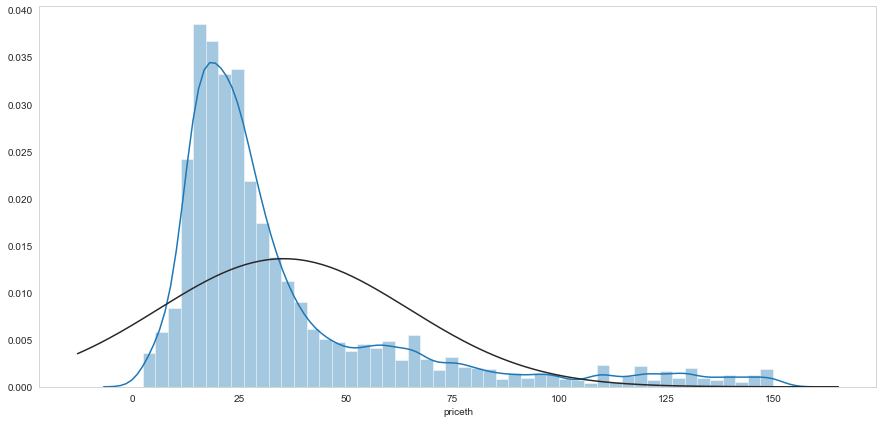

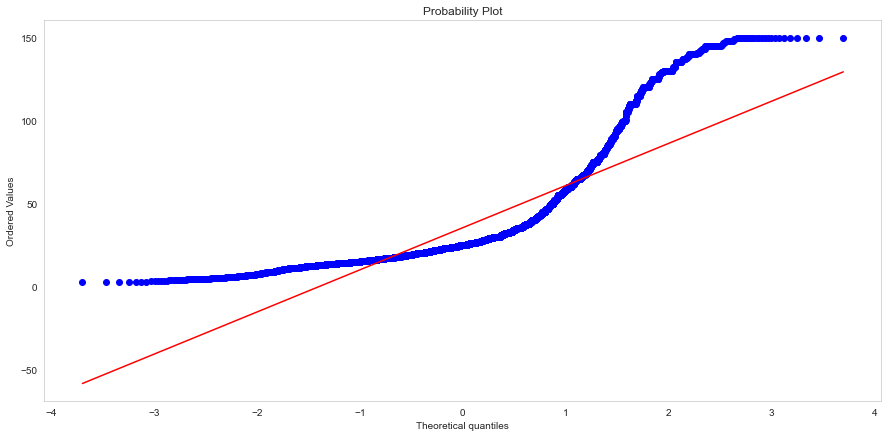

In [515]:
from scipy.stats import norm
from scipy import stats

#histogram and normal probability plot
sns.distplot(df['priceth'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['priceth'], plot=plt)

<ipython-input-518-750d1f55f60d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flooring = df[dataset['floor'] < 4]


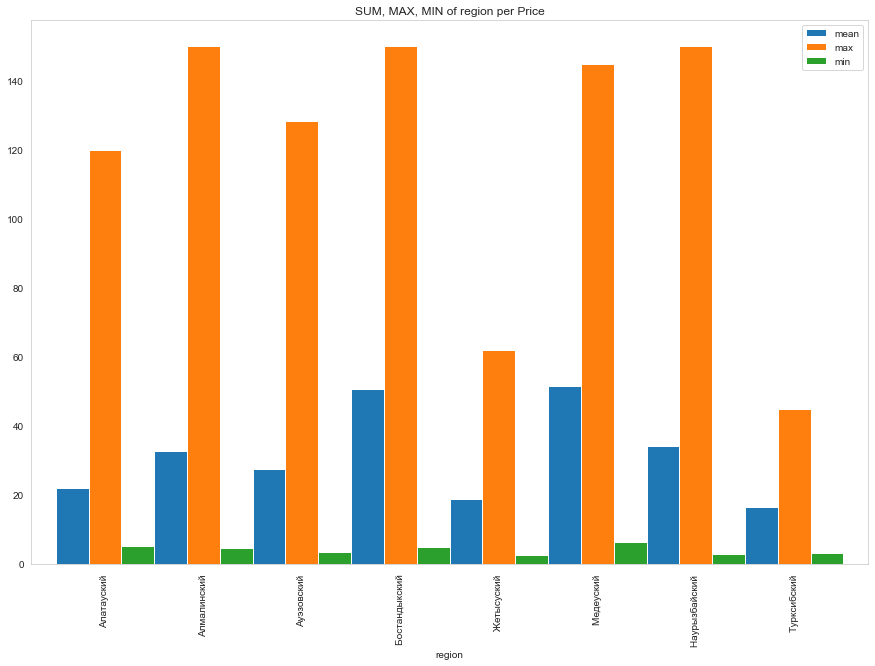

In [518]:
flooring = df[dataset['floor'] < 4]

flooring.groupby('region')['priceth'].agg(['mean', 'max', 'min']).plot.bar(width=1, figsize=(15,10))
plt.title('SUM, MAX, MIN of region per Price')
plt.show()


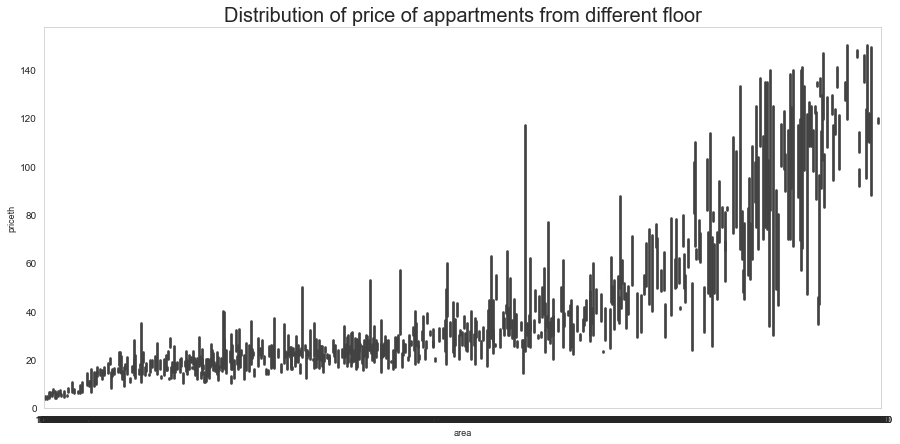

In [521]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = df['area'], y = dataset['priceth'], palette = 'spring')
ax.set_xlabel(xlabel = 'area', fontsize = 9)
ax.set_ylabel(ylabel = 'priceth', fontsize = 9)
ax.set_title(label = 'Distribution of price of appartments from different floor', fontsize = 20)
plt.show()